In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import display 
import math

%matplotlib inline

In [ ]:
datafMultivariable = pd.read_csv('weatherHistory.csv')
datafMultivariable.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472.222.222.222.220,73.888.888.888.888.800,0.89,141.197,251.0,15.826.300.000.000.000,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355.555.555.555.550,7.227.777.777.777.770,0.86,142.646,259.0,15.826.300.000.000.000,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377.777.777.777.770,9.377.777.777.777.770,0.89,39.284.000.000.000.000,204.0,149.569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,828.888.888.888.889,5.944.444.444.444.440,0.83,141.036,269.0,15.826.300.000.000.000,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755.555.555.555.550,6.977.777.777.777.770,0.83,11.0446,259.0,15.826.300.000.000.000,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
datafMultivariable.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
datafMultivariable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  object 
 4   Apparent Temperature (C)  96453 non-null  object 
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  object 
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  object 
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(4), object(8)
memory usage: 8.8+ MB


In [ ]:
nan_df = datafMultivariable[datafMultivariable.isna().any(axis=1)]
nan_df.count()

Formatted Date              517
Summary                     517
Precip Type                   0
Temperature (C)             517
Apparent Temperature (C)    517
Humidity                    517
Wind Speed (km/h)           517
Wind Bearing (degrees)      517
Visibility (km)             517
Loud Cover                  517
Pressure (millibars)        517
Daily Summary               517
dtype: int64

In [ ]:
datafMultivariable.shape

(96453, 12)

In [ ]:
proporcionNaN = 517/datafMultivariable.shape[0]*100
print('La proporción de datos NaN o perdidos en el dataframe es:', proporcionNaN, '%')

La proporción de datos NaN o perdidos en el dataframe es: 0.5360123583506993 %


In [ ]:
datafMultivariable.dropna(inplace=True)
datafMultivariable.shape

(95936, 12)

In [ ]:
dfAUX = datafMultivariable[['Temperature (C)', 
                            'Apparent Temperature (C)', 
                            'Humidity', 
                            'Wind Speed (km/h)',
                            'Wind Bearing (degrees)', 
                            'Visibility (km)', 
                            'Loud Cover',
                            'Pressure (millibars)']]

dfAUX.head()                            

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472.222.222.222.220,73.888.888.888.888.800,0.89,141.197,251.0,15.826.300.000.000.000,0.0,1015.13
1,9.355.555.555.555.550,7.227.777.777.777.770,0.86,142.646,259.0,15.826.300.000.000.000,0.0,1015.63
2,9.377.777.777.777.770,9.377.777.777.777.770,0.89,39.284.000.000.000.000,204.0,149.569,0.0,1015.94
3,828.888.888.888.889,5.944.444.444.444.440,0.83,141.036,269.0,15.826.300.000.000.000,0.0,1016.41
4,8.755.555.555.555.550,6.977.777.777.777.770,0.83,11.0446,259.0,15.826.300.000.000.000,0.0,1016.51


In [ ]:
dfAUX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           95936 non-null  object 
 1   Apparent Temperature (C)  95936 non-null  object 
 2   Humidity                  95936 non-null  float64
 3   Wind Speed (km/h)         95936 non-null  object 
 4   Wind Bearing (degrees)    95936 non-null  float64
 5   Visibility (km)           95936 non-null  object 
 6   Loud Cover                95936 non-null  float64
 7   Pressure (millibars)      95936 non-null  float64
dtypes: float64(4), object(4)
memory usage: 6.6+ MB


In [ ]:
# Parece que no se debería dejar por fuera de nuestro modelo
datafMultivariable['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [ ]:
# Para variables tipo objeto que representan categorías, existe una función "dummy"
# la cual permite transformar a variables "categoricas numéricas"
dfDummy = pd.get_dummies(datafMultivariable['Precip Type'])
dfDummy.head()

,rain,snow
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
dfAUX = dfAUX.merge(dfDummy, left_index= True, right_index=True)
dfAUX.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),rain,snow
0,9.472.222.222.222.220,73.888.888.888.888.800,0.89,141.197,251.0,15.826.300.000.000.000,0.0,1015.13,1,0
1,9.355.555.555.555.550,7.227.777.777.777.770,0.86,142.646,259.0,15.826.300.000.000.000,0.0,1015.63,1,0
2,9.377.777.777.777.770,9.377.777.777.777.770,0.89,39.284.000.000.000.000,204.0,149.569,0.0,1015.94,1,0
3,828.888.888.888.889,5.944.444.444.444.440,0.83,141.036,269.0,15.826.300.000.000.000,0.0,1016.41,1,0
4,8.755.555.555.555.550,6.977.777.777.777.770,0.83,11.0446,259.0,15.826.300.000.000.000,0.0,1016.51,1,0


In [ ]:
dfAUX.describe().T

,count,mean,std,min,25%,50%,75%,max
Humidity,95936.0,0.734841,0.195724,0.0,0.60,0.78,0.89,1.00
Wind Bearing (degrees),95936.0,187.518773,107.385351,0.0,116.00,180.00,290.00,359.00
Loud Cover,95936.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
Pressure (millibars),95936.0,1003.150038,117.276976,0.0,1011.89,1016.42,1021.05,1046.38
rain,95936.0,0.888342,0.314947,0.0,1.00,1.00,1.00,1.00
snow,95936.0,0.111658,0.314947,0.0,0.00,0.00,0.00,1.00


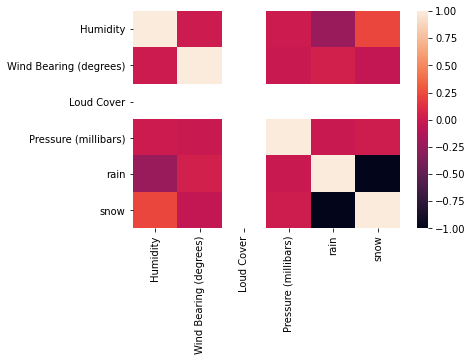

In [ ]:
sms.heatmap(dfAUX.corr())

In [ ]:
# Matriz de correlación
matrixCorrelacion = dfAUX.corr()
matrixCorrelacion

,Humidity,Wind Bearing (degrees),Loud Cover,Pressure (millibars),rain,snow
Humidity,1.000000,0.000814,NaN,0.005375,-0.232622,0.232622
Wind Bearing (degrees),0.000814,1.000000,NaN,-0.011629,0.042142,-0.042142
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),0.005375,-0.011629,NaN,1.000000,-0.009271,0.009271
rain,-0.232622,0.042142,NaN,-0.009271,1.000000,-1.000000
snow,0.232622,-0.042142,NaN,0.009271,-1.000000,1.000000


In [ ]:
def relacionFeatures(corrMatrix, umbral):
  feature = []
  valores = []

  for i, index in enumerate(corrMatrix.index):
    if abs(corrMatrix[index]) > umbral:
      feature.append(index)
      valores.append(corrMatrix[index])

  df = pd.DataFrame(data = valores, index = feature, columns=['Valor de Correlación'])
  return df

**Funcion de entrenamiento y de Obtencion de metricas**

Paso 1: Identificar las variables del umbral de correlacion <br>
Dividir en los conjuntos entrenamiento y prueba<br>
Seleccionar el modelo<br>
Entrenar<br>
Obtener las metricas<br>
Paso 2: Identificar la MULTICOLINEALIDAD

In [ ]:
def training(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
  modelo = LinearRegression()
  modelo.fit(X_train, y_train)
  y_predict_train = modelo.predict(X_train)
  y_predict = modelo.predict(X_test)

  return y_predict, y_test


def metricas(umbral):

  valorCorrelacion = relacionFeatures(matrixCorrelacion['Apparent Temperature (C)'], umbral)
  dataCorrelacion = dfAUX[valorCorrelacion.index]
  X = dataCorrelacion.drop('Apparent Temperature (C)', axis=1)
  y = dataCorrelacion['Apparent Temperature (C)']
  y_predict, y_test = training(X, y)

  puntuacion = r2_score(y_test, y_predict)
  meanabsoluteerror = mean_absolute_error(y_test, y_predict)
  mse = mean_squared_error(y_test, y_predict)
  valorCorrelacion = valorCorrelacion.T
  valorCorrelacion['r2_score'] = puntuacion
  valorCorrelacion['MAE'] = meanabsoluteerror
  valorCorrelacion['MSE'] = mse
  valorCorrelacion.reset_index(inplace=True, drop=True)

  print('Metricas\n')
  
  return valorCorrelacion

umbral=0.2
print('Ejemplo Umbral de 0.2')
metricas(umbral)

Ejemplo Umbral de 0.2


KeyError: ignored

**EJEMPLOS**

Ejemplo Umbral de 0.2


KeyError: ignored

In [ ]:
# ejemplo -> umbral = 0.4
print('\033[1mCon un umbral de 0.4 \033[0m \n')
metricas(umbral=0.4)

Con un umbral de 0.4  

Métricas de Evaluación



,Temperature (C),Apparent Temperature (C),Humidity,rain,snow,r2_score,MAE,MSE
0,0.992637,1.0,-0.60239,0.566058,-0.566058,0.986341,0.942915,1.564409


In [ ]:
# ejemplo -> umbral = 0.6
print('\033[1mCon un umbral de 0.6 \033[0m \n')
metricas(umbral=0.6)

Con un umbral de 0.6  



KeyError: ignored